# 💰 Maximizing Revenue for Taxi🚖Drivers through Payment Type Analysis

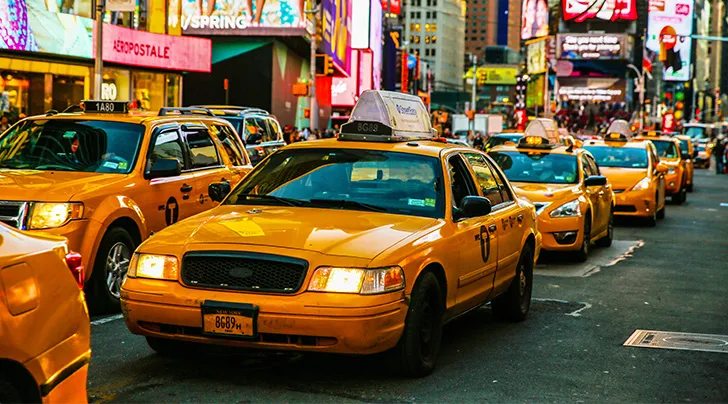


# ❓ Problem Statement

In the fast-paced 🚕 taxi booking sector, maximizing 💵 revenue is crucial for long-term success and driver satisfaction. Our goal is to leverage 📊 data-driven insights to boost earnings for taxi drivers. 🚀

This study investigates whether 💳 payment type influences fare pricing, helping drivers optimize their revenue streams effectively.

# 🎯 Objective

The primary goal of this project is to conduct an A/B test 🔍 to analyze the relationship between total fare 💰 and payment method 💳💵.

We utilize 📉 Python hypothesis testing and 📈 descriptive statistics to derive meaningful insights that can help drivers increase their income.

Specifically, we aim to determine whether there is a significant difference in fares between customers who use 💳 credit cards versus those who use 💵 cash.

# 🔎 Research Question

💡 Is there a relationship between total fare amount 💰 and payment type 💳💵?

Can we nudge customers toward payment methods that generate higher revenue 📈 for drivers without negatively impacting their experience? 🤔

🚀 Let’s dive in and find out! 🧐📊

# ---------------------------------------------------------------------------------------------------------------

# Methodology

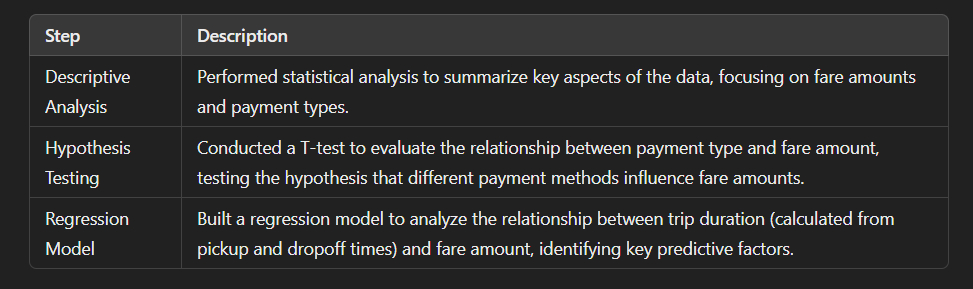

# Importing Libraries

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [173]:
df=pd.read_csv("yellow_tripdata_2016-01.csv")

MemoryError: Unable to allocate 256. KiB for an array with shape (32768,) and data type int64

# Exploratory Data Analysis

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe(include=object)

In [ ]:
df.isnull().sum()/df.shape[0]*100

change the data type of pickup and dropoff from OBJECT TO DATETIME

In [ ]:
 df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])

In [ ]:
 df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df.dtypes

Feature extraction: fetch the duration from pickup and dropoff time

In [ ]:
df['duration']=df['tpep_dropoff_datetime']- df['tpep_pickup_datetime']
df['duration']=df['duration'].dt.total_seconds()/60

In [ ]:
df.head(100)

In [ ]:
df[df['duration'] == 0.0]

drop rows where duration is 0 because that doesn't make sense

In [ ]:
df=df[df['duration'] !=0.0]

In [ ]:
df.reset_index()

In [ ]:
pd.set_option('display.max_columns',500)

Keep only those columns that have some impact or have relation with fare columns

In [ ]:
df.head()

In [ ]:
df=df[['passenger_count','payment_type','trip_distance','fare_amount','total_amount','duration']]

In [ ]:
df

In [ ]:
df.duplicated().sum()/len(df)*100

Dropping duplicate Data from dataset

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

Checking frequency and contribution of columns

In [ ]:
df['passenger_count'].value_counts(normalize=True)

In [ ]:
df['payment_type'].value_counts(normalize=True)

Filtering the data based on their contrubution:

    ~~ As passenger count less than "1" and greater than >6 doesn't make sense so we drop that.
    
    ~~ similarly payment_type are more commonly only 3 ways: "cash","card","Upi"

In [ ]:
df=df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [ ]:
df=df[df['payment_type']<3]

In [ ]:
df

Now change the encoding of payment_type:
    -- 1 : Card
    -- 2 : Cash

In [ ]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [ ]:
df.head()

In [ ]:
df.describe()

As you can data contain some negative values which we have to remove

data also contain some outliers

In [ ]:
df=df[(df['fare_amount']>0)&(df['trip_distance']>0)&(df['total_amount']>0)&(df['duration']>0)]

In [ ]:
df

Now check for ouliers:

In [ ]:
num_cols=df.select_dtypes(include=['int64','float64'])
num_cols

In [ ]:
plt.figure(figsize=(15,10))
a=1
for i in num_cols:
    plt.subplot(3,2,a)
    sns.boxplot(df[i],color="Orange")
    a=a+1
plt.show()

As you all can se data contain huge amounts of outliers in all columns:
    
[Note: passenger_count is an categorical column but labelled as integer so pl ignore it]

now removing outliers

In [153]:
num_cols=df[['trip_distance','fare_amount','total_amount','duration']]

In [154]:
for i in num_cols:
    Q1= df[i].quantile(0.25)
    Q3= df[i].quantile(0.75)
    
    IQR=Q3-Q1
    
    upper_limit=Q3+1.5*(IQR)
    lower_limit=Q1-1.5*(IQR)
    
    df[i]= np.where(df[i]>upper_limit,upper_limit, np.where(df[i]<lower_limit,lower_limit, df[i]))

In [155]:
num_cols=df.select_dtypes(include=['int64','float64'])
num_cols

,passenger_count,trip_distance,fare_amount,total_amount,duration
5,2,5.52,19.0,20.30,18.500000
6,2,7.45,26.0,27.30,26.750000
7,1,1.20,9.0,10.30,11.900000
8,1,6.00,18.0,19.30,11.200000
9,1,3.21,11.5,12.80,11.100000
...,...,...,...,...,...
10906849,1,7.83,29.0,35.30,32.983333
10906851,1,1.68,7.0,9.30,6.616667
10906852,1,2.65,11.0,13.30,11.950000
10906855,3,1.40,7.5,8.80,39.375000


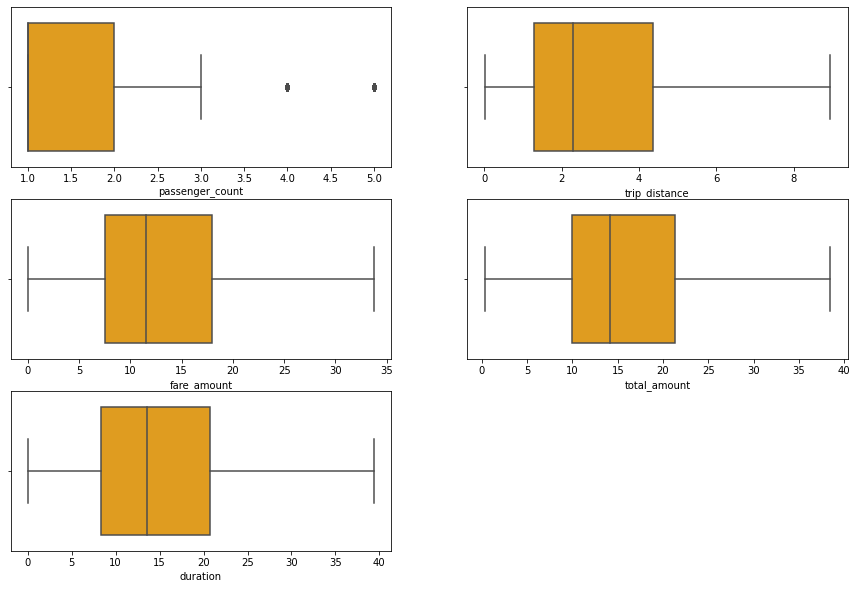

In [156]:
plt.figure(figsize=(15,10))
a=1
for i in num_cols:
    plt.subplot(3,2,a)
    sns.boxplot(df[i],color="Orange")
    a=a+1
plt.show()

In [42]:
df

,passenger_count,payment_type,trip_distance,fare_amount,total_amount,duration
5,2,Cash,5.52,19.0,20.30,18.500000
6,2,Cash,7.45,26.0,27.30,26.750000
7,1,Cash,1.20,9.0,10.30,11.900000
8,1,Cash,6.00,18.0,19.30,11.200000
9,1,Cash,3.21,11.5,12.80,11.100000
...,...,...,...,...,...,...
10906849,1,Card,7.83,29.0,35.30,32.983333
10906851,1,Card,1.68,7.0,9.30,6.616667
10906852,1,Card,2.65,11.0,13.30,11.950000
10906855,3,Cash,1.40,7.5,8.80,39.375000


In [43]:
a=df['payment_type'].value_counts()
a

Card    4778569
Cash    1898698
Name: payment_type, dtype: int64

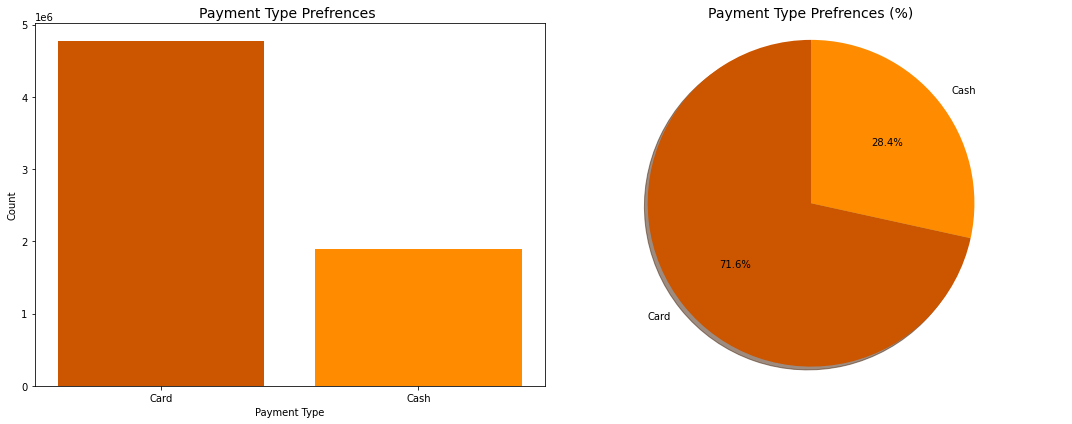

In [44]:
plt.figure(figsize=(15, 6))

# Subplot 1: Count Plot
plt.subplot(1, 2, 1)
plt.title("Payment Type Prefrences ", fontsize=14)
plt.bar(a.index, a.values, color=['#CC5500', '#FF8C00'])
plt.xlabel("Payment Type")
plt.ylabel("Count")

# Subplot 2: Pie Chart
plt.subplot(1, 2, 2)
plt.title("Payment Type Prefrences (%)", fontsize=14)
plt.pie(a.values, labels=a.index, autopct="%0.1f%%", colors=['#CC5500', '#FF8C00'], startangle=90,shadow=True)
plt.axis("equal")  

plt.tight_layout()  
plt.show()

Observations: 
    
    ✔ Card is the most common payment method, significantly higher than other methods.
    ✔ Card accounts for ~71.6% of all payments, making it the dominant method.
    
Key Insights:
    
    ✔ Card is still the preferred payment method, making up the majority of transactions.
    ✔ Cash usage is significant but still less than half of card transactions.

We're interested on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variations in the
distribution of payment types concerning different fare amounts or trip distances?

To investigate this, we'll plot histograms to visualize the distribution of passenger counts paying with either card or cash. This will also provide stakeholders with
insight into fare amount ranges associated with different payment methods.

In [45]:
df.groupby(['payment_type']).agg({'fare_amount': ['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           14.146400  8.544118      3.278151  2.644238
Cash           13.938096  8.497302      3.213563  2.624720

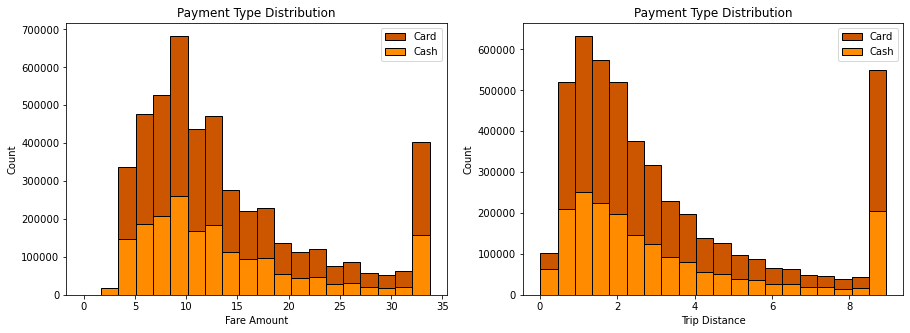

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Payment Type Distribution")
plt.xlabel("Fare Amount")
plt.ylabel("Count")
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype= 'barstacked', bins= 20, edgecolor= 'k',color='#CC5500',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype= 'barstacked', bins= 20, edgecolor= 'k',color='#FF8C00', label='Cash')
plt.legend()


plt.subplot(1,2,2)
plt.title("Payment Type Distribution")
plt.xlabel("Trip Distance")
plt.ylabel("Count")
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype= 'barstacked', bins= 20, edgecolor= 'k',color='#CC5500',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype= 'barstacked', bins= 20, edgecolor= 'k',color='#FF8C00', label='Cash')


plt.legend()
plt.show()

Fare Amount vs. Payment Type (Left Chart):

>Most fares are in the 5 to 15 range, with the highest peak around 10.

>Card payments dominate across all fare amounts, but cash payments are more frequent for lower fares.

>There is a noticeable increase in cash payments at very high fare amounts (above 30), suggesting some riders prefer cash for expensive trips.

Trip Distance vs. Payment Type (Right Chart):

>The majority of trips are short distances (0 to 3 miles).

>Card payments are consistently higher than cash payments for all distances.

>Similar to fare distribution, cash payments appear relatively higher for longer trips (above 8 miles).

General Observations:

>Short trips and lower fares have more cash transactions, likely due to convenience.

>Card payments dominate overall, suggesting a preference for digital payments, possibly due to ride-hailing apps or corporate rides.

>An unusual spike at the highest trip distances (8+ miles) might indicate specific long-distance trips where cash payments are common (e.g., airport or outstation rides).

In [47]:
# here we find the distribution of passenger_count by payment_type
passenger_count= df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [48]:
# here we find the % contribution by passenger_count
passenger_count['Percentage %']= (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,Percentage %
0,Card,1,3182071,47.655291
1,Card,2,845045,12.655552
2,Card,3,257417,3.855125
3,Card,4,119220,1.785461
4,Card,5,374816,5.613315
5,Cash,1,1125065,16.849184
6,Cash,2,381712,5.716590
7,Cash,3,136673,2.046840
8,Cash,4,77298,1.157629
9,Cash,5,177950,2.665012


In [49]:
pivot = passenger_count.pivot(index="payment_type", columns="passenger_count", values="Percentage %")
pivot

passenger_count,1,2,3,4,5
payment_type,,,,,
Card,47.655291,12.655552,3.855125,1.785461,5.613315
Cash,16.849184,5.716590,2.046840,1.157629,2.665012


In [50]:
# Create new dataframe
stack = pd.DataFrame(columns=["Payment_type", 1, 2, 3, 4, 5])
stack["Payment_type"] = ["Card", "Cash"]
print(stack)

# Fill NaN values with pivot table data
for col in [1, 2, 3, 4, 5]:
    stack[col] = stack["Payment_type"].map(pivot[col])               

# Display updated dataframe
stack=pd.DataFrame(stack)
stack

  Payment_type    1    2    3    4    5
0         Card  NaN  NaN  NaN  NaN  NaN
1         Cash  NaN  NaN  NaN  NaN  NaN


,Payment_type,1,2,3,4,5
0,Card,47.655291,12.655552,3.855125,1.785461,5.613315
1,Cash,16.849184,5.716590,2.046840,1.157629,2.665012


In [51]:
stack

,Payment_type,1,2,3,4,5
0,Card,47.655291,12.655552,3.855125,1.785461,5.613315
1,Cash,16.849184,5.716590,2.046840,1.157629,2.665012


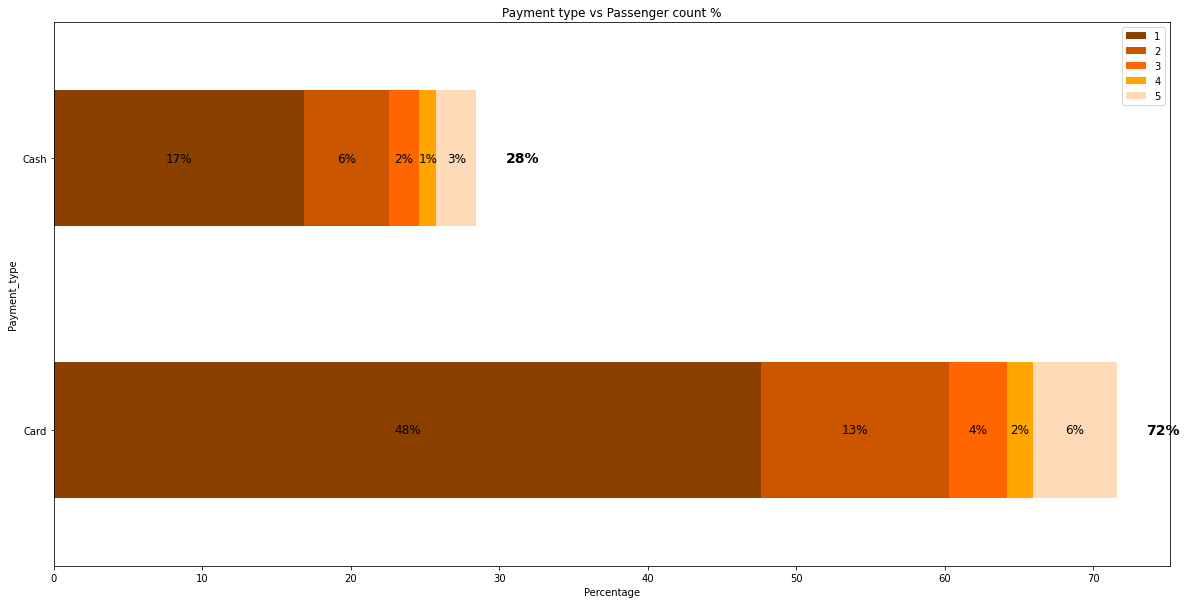

In [52]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.xlabel("Percentage")
plt.title("Payment type vs Passenger count %")
stack.plot(x='Payment_type', kind='barh', stacked=True, ax=ax, color=["#8B4000", "#CC5500", "#FF6600", "#FFA500", "#FFDAB9"])

# Add percentage text inside bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, '{:.0f}%'.format(width),
            ha='center', va='center', fontsize=12, color='black')

# Add total sum at the end of each bar
totals = stack.iloc[:, 1:].sum(axis=1)  # Summing all percentage columns

for i, total in enumerate(totals):
    ax.text(total + 2, i, '{:.0f}%'.format(total), 
            ha='left', va='center', fontsize=14, fontweight='bold', color='black')

plt.show()


Insights from the Chart:
    
>Card Payments Dominate – 72% of transactions are made via card, showing a strong preference for digital payments.

>Cash Transactions Are Lower – Only 28% of payments are in cash, indicating a shift towards cashless transactions.

>Single Passenger Rides Are Most Common – The majority of both payment types involve a single passenger (48% for card, 17% for cash).

>Larger Groups Prefer Cards – Higher passenger counts (e.g., 3-5 passengers) show a slightly greater percentage using card payments compared to cash.

>Business Implication – 
* Encouraging digital payments (cards, UPI, or wallets) might align with customer preferences.
* If targeting cash users, incentives like discounts for digital payments could be introduced.
* The diverse cash payment segments suggest that specific customer groups still rely on it, so maintaining a cash option is necessary.

# Now---------------------------------------------------------------------------------------------------------

# HYPOTHESIS TESTING

# Null Hypothesis (Ho) : There is no difference between average fare between customer who use credit cards and who use cash.
    
# Alternate Hypothesis (H1) : There is a significance difference between average fare between customer who use credit cards and who use cash.

# Now select the test you want to apply on hypothesis

T-test   = Compares the means of two groups to check if they are significantly different.

Z-test   = Also compares two means, but used when the sample size is large (n > 30) and population variance is known.

F-test (Annova test)  = Compares the means of more than two groups to check for significant differences.

Chi-Square-test  = Tests the relationship between two categorical variables (not means).

In [53]:
# first check distribution of fare_amount to select z test ot t test

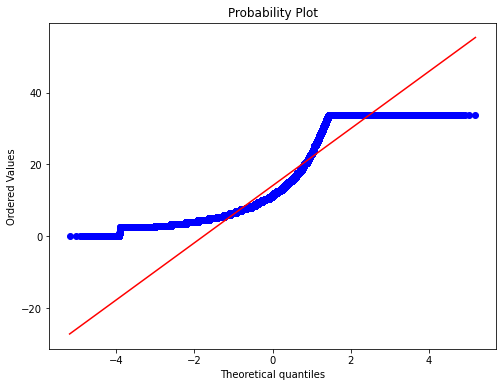

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))
st.probplot(df['fare_amount'], dist="norm",plot=ax)
plt.show()

As we can see data is not normally distributed so we choose [ T -TEST FOR OUR HYPOTHESIS] : POPn std is unkown, data is small 


Given that the T-test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analyses of taxi trip data.

In the analysis of NYC Yellow Taxi Trip Records, where you're likely dealing with an unknown population standard deviation and potentially large datasets, the T-test offers a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

In [55]:
# Take samples

card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

In [56]:
t_stats,p_value= st.ttest_ind(a=card_sample,b=cash_sample,equal_var= False)

In [57]:
print("Value of ttest: ", t_stats)
print("Value of P_value: ",p_value)


# Now compare the P-value with significance value(alpha) of 5% or 0.05

if p_value < 0.05:
    print("\nReject the Null Hypothesis")
elif p_value >=0.05:
    print("\nAccept the Null Hypothesis")

Value of ttest:  28.530671058579074
Value of P_value:  5.116643205820282e-179

Reject the Null Hypothesis


# 🔬✨ Final Insights from T-Test:

📝 Null Hypothesis (H₀): There is no difference in the average fare between customers using 💳 credit cards and 💵 cash.

⚡ Alternative Hypothesis (H₁): There is a significant difference in the average fare between the two payment types.

# 📊 T-Test Results:

📈 T-Statistic: 28.53

📉 P-Value: 5.11 × 10⁻¹⁷⁹ (Extremely small 🔥)

📏 Significance Level (α): 0.05 (5%)

# 🎯 Conclusion:

Since the p-value is much smaller than 0.05, we 🚀 reject the null hypothesis. This means that there is a statistically significant difference in the average fare between 💳 credit card users and 💵 cash users. ✅

# ---------------------------------------------------------------------------------------------------------------

# Regression Analysis using Decision Tree

Importing Model Libraries

In [76]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import  mean_squared_error as mse, mean_absolute_error as mae, r2_score,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [62]:
df

,passenger_count,payment_type,trip_distance,fare_amount,duration
5,2,Cash,5.52,19.0,18.500000
6,2,Cash,7.45,26.0,26.750000
7,1,Cash,1.20,9.0,11.900000
8,1,Cash,6.00,18.0,11.200000
9,1,Cash,3.21,11.5,11.100000
...,...,...,...,...,...
10906849,1,Card,7.83,29.0,32.983333
10906851,1,Card,1.68,7.0,6.616667
10906852,1,Card,2.65,11.0,11.950000
10906855,3,Cash,1.40,7.5,39.375000


In [65]:
# apply ONE-HOT-ENCODING on payment_type column
df= pd.get_dummies(df, columns=['payment_type'])

In [66]:
df

,passenger_count,trip_distance,fare_amount,duration,payment_type_Card,payment_type_Cash
5,2,5.52,19.0,18.500000,0,1
6,2,7.45,26.0,26.750000,0,1
7,1,1.20,9.0,11.900000,0,1
8,1,6.00,18.0,11.200000,0,1
9,1,3.21,11.5,11.100000,0,1
...,...,...,...,...,...,...
10906849,1,7.83,29.0,32.983333,1,0
10906851,1,1.68,7.0,6.616667,1,0
10906852,1,2.65,11.0,11.950000,1,0
10906855,3,1.40,7.5,39.375000,0,1


In [67]:
#splitting the data into train and test data

x=df.drop(columns=['fare_amount'])
y=df['fare_amount']

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4674086, 5)
(2003181, 5)
(4674086,)
(2003181,)


In [70]:
# building the model

DT= DecisionTreeRegressor()

In [71]:
# fitting the data into model

DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [72]:
y_pred=DT.predict(x_test)
y_pred_train=DT.predict(x_train)

In [79]:
# Accuracuy on test data

# Compute metrics
mae = mae(y_pred,y_test)
mse = mse(y_pred,y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_pred,y_test)

# Print results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 0.528135904004502
MSE: 2.3117569859560585
RMSE: 1.5204463114349216
R² Score: 0.9679625131397093


In [74]:
# Accuracy on train data

r2_score(y_pred_train,y_train)

0.9873469488295465

AS we can see there must be overfitting in model so we do Hyperparameter tunning

In [86]:
grid_param = {
    'max_depth': [3, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1), 
    'min_samples_split': range(2,10,1), 
    'splitter': ['best', 'random']}

In [89]:
grid_search = GridSearchCV(estimator=DT, param_grid=grid_param,cv=5,n_jobs =1)

In [91]:
grid_search.fit(x_train,y_train)

In [92]:
best_parameters=grid_search.best_params_
print(best_parameters)

In [103]:
#now again fit model with best parameters
tree_model=DecisionTreeRegressor(max_depth=5,min_samples_leaf=4, min_samples_split=9, splitter='random')
tree_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=9,
                      splitter='random')

In [104]:
y_pred=tree_model.predict(x_test)

In [105]:
y_pred_train=tree_model.predict(x_train)

In [111]:
r2_score(y_pred,y_test)

0.9418082122237846

In [107]:
r2_score(y_pred_train,y_train)

0.9417646080398131